<a href="https://colab.research.google.com/github/Hamza1122/Deep-Learning-Ass/blob/master/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<strong><h1>Efficient Training of Convolutional Neural Network </h1></strong>



<h2> What to submit </h2>

<ol>
<li>	Your Python notebook solution source file. </li>
<li>	The output of your Python notebook solution <emph>exported</emph> in HTML format.</li>
<li>	Extra files needed to complete your task, if any (e.g., images used in your answers).</li>
</ol>
</p>


<h2> Warning </h2>

Some components of this task may involve heavy computation that runs for a long duration. Please start early to avoid missing the due date.

<h2> Marking criteria </h2>

<p>
Your submission will be assessed using the following criteria.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to details through a good quality  report.</li>
</ul>
</p>

<p>
Indicative weights of various tasks are provided, but the task will be assessed by the overall quality per the above criteria.
</p>
</div>

## Task objective

You will experience training a much deeper network on a large-scale dataset. 

## Task 1 Solving Fashion-MNIST with Convolutional Neural Networks


In previous task, you tackled the image classification problem in Fashion-MNIST. There, you used a Densely Connected Neural Network. You should now know that is not an optimal model architecture for the problem. In this task, you will apply the best practices of deep-learning computer vision to improve the image classification performance.

### Task 1.1 Revisit Fashion-MNIST classification with DNN


Review your previous tasks solution, and reproduce the experiment here. Try to improve the model without changing the model architecture.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


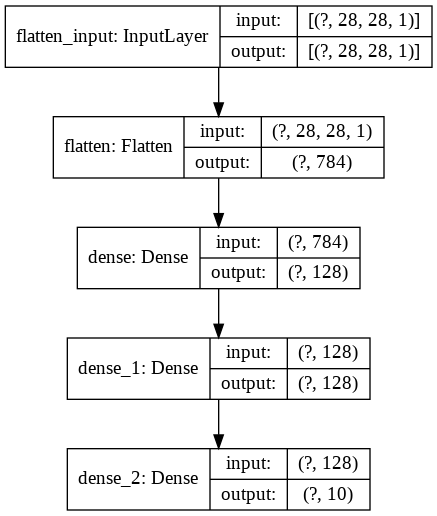

In [1]:
# Loading the mnist dataset with Keras
#importing libraries
from keras import models, layers
from keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib import pyplot
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
import numpy as np
import time
import keras
tfds.disable_progress_bar()
tf.enable_v2_behavior()


(ds_train, ds_test), ds_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']                  


# preprocessing using pipelining
def preprocess(features):
    image = features['image']
    image = tf.image.resize(image, (28,28))
    image = image / 255.0
    return image, features['label']  


#creating input pipeline
ds_train = ds_train.map(
    preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)


#ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)   



#creating pipeling for test images
ds_test = ds_test.map(
    preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)


import datetime
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
path="logs/fit/" +datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1,write_graph=True)


#setting up a model for training
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

from keras.utils.vis_utils import plot_model
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [2]:
# We are using Gradient Norm With Adam
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.001,clipnorm=1.0),metrics=['accuracy'])
history=model.fit(ds_train,epochs=1,validation_data=ds_test,callbacks=[callback])

      1/Unknown - 0s 432us/step - loss: 2.5144 - accuracy: 0.0625WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


469/469 [==============================] - 2s 5ms/step - loss: 0.5344 - accuracy: 0.8106 - val_loss: 0.4341 - val_accuracy: 0.8462


### Task 1.2 Train a ConvNet from scratch


Build a ConvNet to replace the densely connected network in Task 1.1. Report the classification accuracy on the test set. Aim to achieve higher accuracy. 



In [3]:
#Now Using CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

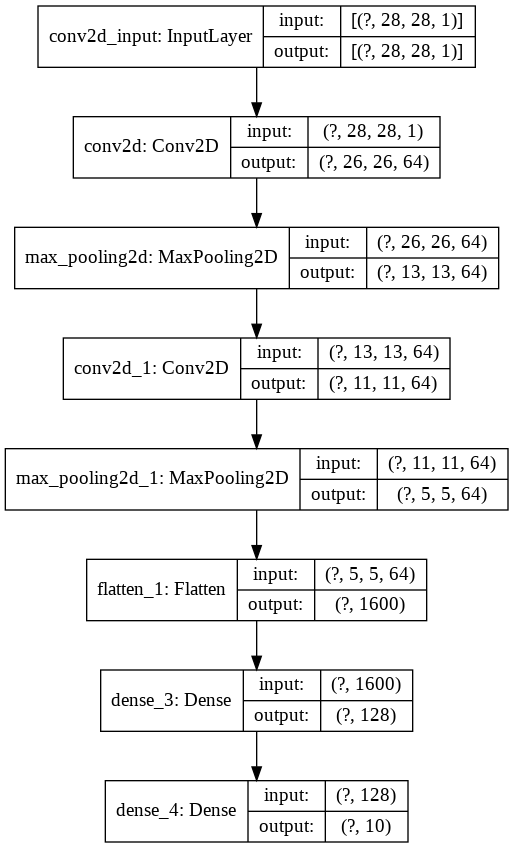

In [4]:
from keras.utils.vis_utils import plot_model
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [5]:
# We are using Gradient Norm With Adam
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.001,clipnorm=1.0),metrics=['accuracy'])
history=model.fit(ds_train,epochs=10,validation_data=ds_test,callbacks=[callback])

Epoch 1/10
      2/Unknown - 0s 32ms/step - loss: 2.2702 - accuracy: 0.2305 WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0060s vs `on_train_batch_end` time: 0.0563s). Check your callbacks.


469/469 [==============================] - 3s 6ms/step - loss: 0.5216 - accuracy: 0.8166 - val_loss: 0.3833 - val_accuracy: 0.8624
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3330 - accuracy: 0.8794 - val_loss: 0.3175 - val_accuracy: 0.8820
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2863 - accuracy: 0.8961 - val_loss: 0.3059 - val_accuracy: 0.8888
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2544 - accuracy: 0.9070 - val_loss: 0.2851 - val_accuracy: 0.8985
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2324 - accuracy: 0.9152 - val_loss: 0.2684 - val_accuracy: 0.9041
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2128 - accuracy: 0.9213 - val_loss: 0.2575 - val_accuracy: 0.9072
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1949 - accuracy: 0.9285 - val_loss: 0.2549 - val_accuracy: 0.9063
Epoch 8/10
469/46

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


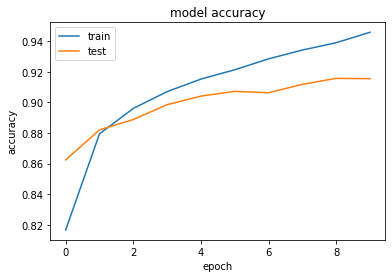

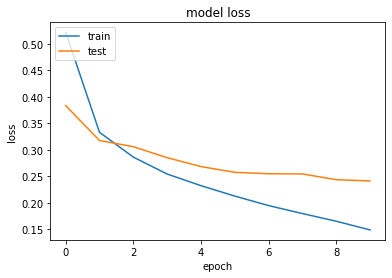

In [6]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Task 1.3 Build an input pipeline for data augmentation


Build a data preprocessing pipeline to perform data augmentation. (You may use Keras ImageDataGenerator or write your own transformations.)

- Report the new classification accuracy. Make sure that you use the same number of training epochs as in Task 1.2.

- Profile your input pipeline to identify the most time-consuming operation. What actions have you taken to address that slow operation? (*Hint: You may use the [TensorFlow Profiler](https://github.com/tensorflow/profiler).*)

### Task 1.4 Fashion-MNIST with transfer learning



Use a pretrained model as the convolutional base to improve the classification performance. (Hint: You may use models in Keras Applications or those in the TensorFlow Hub.)

- Try both with fine-tuning and without fine-tuning.
- Report the model performance as before.



### Task 1.5 Performance comparison


Record the test accuracy achieved at different training configurations above. Which method achieved the highest accuracy? Why did it work better for this problem?


## Task 2 Fast training of deep networks

###### Task 2.1 Train a highly accurate network for CIFAR10


In this task, you will train deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). Compared with the datasets that you have worked on so far, CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem.



#### Task 2.1.1 Document the hardware used

Before you start, write down your hardware specifications, including 

- the GPU model, the number of GPUs, and the GPU memory
- the CPU model, the number of CPUs, and the CPU clock speed

(Hint: you may find commands like `nvidia-smi`, `lscpu` or `psutil` useful.)

#### Task 2.1.2 Train a "shallow" ConvNet

Build a ConvNet with fewer than 10 layers. Train the network until it converges. You will use this network as a baseline for the later experiments. 

- Plot the training and validation history. 
- Report the testing accuracy. 

#### Task 2.1.3 Train a ResNet

Train a residual neural network (ResNet) on the CIFAR10 training data and report the test accuracy and the training time.

The ResNet is a popular network architecture for image classification. You may find more information about how ResNet works by reading this [paper](https://arxiv.org/abs/1512.03385).


*(You may implement a resnet model or use an existing implementation. In either case, you should not use pretrained network weights.)*

### Task 2.2 Fast training of ResNet


In this task, you will experiment with different ways to reduce the time for training your ResNet on CIFAR10. There are different ways to speed up neural network training; below are two ideas. Please select at least one idea to implement. Explain the experiment steps and report the final performance and training time.

#### Option 1. Learning rate schedule

Use a learning rate schedule for the training. Some popular learning rate schedules include 

- the Step Decay learning rate (e.g., see [here](https://github.com/kuangliu/pytorch-cifar))
- [Cyclical learning rates](https://arxiv.org/abs/1506.01186)
- [The exponential learning rate](https://openreview.net/forum?id=rJg8TeSFDH) 

Also Keras provides [some convenient functions](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules) that you can use.


#### Option 2. Look ahead optimiser

Read [this paper](https://arxiv.org/abs/1907.08610) and implement the Lookahead optimiser.

### Task 2.3 Performance comparison


Based on the above experiments, which method or which combination of methods result in the best accuracy with the same training time.

## Task 3 Design a novel deep neural network model 
Here, you have to show your critical idea to design a new neural network model. We will evaluate your results based on the novelty of the model and performance of the model. 

### Task 3.1: The key idea to design a novel deep neural networks for CIFAR10


In this task, you will design a novel deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem. Different from Task 2, in this task you are required to design a novel neural network and optimize the performance in classification. In your answer, you have to clearly present what the key difference between your model and the classic ones, what the benefits in your design model.

### Task 3.2: The implementation of the novel deep neural networks for CIFAR10



In this task, it requires you to write the codes for model implementation and report the performance. In your results, you have to demonstrate the compared performance of your new model and the state-of-the-art models.

---
**END OF PART TWO**